In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.metrics import classification_report, accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.utils import resample

In [2]:
Data = pd.read_csv(r"C:\Users\DELL\Downloads\Fraud.csv")

In [3]:
Data

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.00,160296.36,M1979787155,0.00,0.00,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.00,19384.72,M2044282225,0.00,0.00,0,0
2,1,TRANSFER,181.00,C1305486145,181.00,0.00,C553264065,0.00,0.00,1,0
3,1,CASH_OUT,181.00,C840083671,181.00,0.00,C38997010,21182.00,0.00,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.00,29885.86,M1230701703,0.00,0.00,0,0
...,...,...,...,...,...,...,...,...,...,...,...
1048570,95,CASH_OUT,132557.35,C1179511630,479803.00,347245.65,C435674507,484329.37,616886.72,0,0
1048571,95,PAYMENT,9917.36,C1956161225,90545.00,80627.64,M668364942,0.00,0.00,0,0
1048572,95,PAYMENT,14140.05,C2037964975,20545.00,6404.95,M1355182933,0.00,0.00,0,0
1048573,95,PAYMENT,10020.05,C1633237354,90605.00,80584.95,M1964992463,0.00,0.00,0,0


In [4]:
Data.describe()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
count,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1048575.0
mean,2.696617e+01,1.586670e+05,8.740095e+05,8.938089e+05,9.781600e+05,1.114198e+06,1.089097e-03,0.0
std,1.562325e+01,2.649409e+05,2.971751e+06,3.008271e+06,2.296780e+06,2.416593e+06,3.298351e-02,0.0
min,1.000000e+00,1.000000e-01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.0
25%,1.500000e+01,1.214907e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.0
50%,2.000000e+01,7.634333e+04,1.600200e+04,0.000000e+00,1.263772e+05,2.182604e+05,0.000000e+00,0.0
75%,3.900000e+01,2.137619e+05,1.366420e+05,1.746000e+05,9.159235e+05,1.149808e+06,0.000000e+00,0.0
max,9.500000e+01,1.000000e+07,3.890000e+07,3.890000e+07,4.210000e+07,4.220000e+07,1.000000e+00,0.0


In [5]:
Data.dtypes

step                int64
type               object
amount            float64
nameOrig           object
oldbalanceOrg     float64
newbalanceOrig    float64
nameDest           object
oldbalanceDest    float64
newbalanceDest    float64
isFraud             int64
isFlaggedFraud      int64
dtype: object

In [6]:
Data.isnull()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...
1048570,False,False,False,False,False,False,False,False,False,False,False
1048571,False,False,False,False,False,False,False,False,False,False,False
1048572,False,False,False,False,False,False,False,False,False,False,False
1048573,False,False,False,False,False,False,False,False,False,False,False


In [7]:
# Checking for null values in the dataset
Data.isnull().sum()

step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
isFlaggedFraud    0
dtype: int64

In [8]:
Data.isna()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...
1048570,False,False,False,False,False,False,False,False,False,False,False
1048571,False,False,False,False,False,False,False,False,False,False,False
1048572,False,False,False,False,False,False,False,False,False,False,False
1048573,False,False,False,False,False,False,False,False,False,False,False


In [9]:
# checking for missing values in the dataset
Data.isna().sum()

step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
isFlaggedFraud    0
dtype: int64

In [10]:
# checking for the no of uniques values in each column and their count
for column in Data.columns:
    # Get the number of unique values and their counts
    unique_counts = Data[column].value_counts()
    num_unique = len(unique_counts)
    
    # Print the column name, number of unique values, and their counts
    print(f"Column: {column}")
    print(f"Number of unique values: {num_unique}")
    print("Counts of unique values:")
    print(unique_counts)
    print("\n")

Column: step
Number of unique values: 95
Counts of unique values:
step
19    51352
18    49579
43    45060
15    44609
17    43361
      ...  
67        6
54        4
76        4
28        4
29        4
Name: count, Length: 95, dtype: int64


Column: type
Number of unique values: 5
Counts of unique values:
type
CASH_OUT    373641
PAYMENT     353873
CASH_IN     227130
TRANSFER     86753
DEBIT         7178
Name: count, dtype: int64


Column: amount
Number of unique values: 1009606
Counts of unique values:
amount
10000000.00    14
706.25          6
1711.67         5
3172.71         5
5838.16         5
               ..
49696.49        1
49225.70        1
30666.99        1
328559.51       1
11450.03        1
Name: count, Length: 1009606, dtype: int64


Column: nameOrig
Number of unique values: 1048317
Counts of unique values:
nameOrig
C1214450722    2
C309111136     2
C1268675361    2
C720460198     2
C1109092856    2
              ..
C560131732     1
C455251560     1
C650578540     1
C188

In [11]:
# Encoding the categorical values and string so that it can be feed as input to the models
from sklearn.preprocessing import LabelEncoder

# Create a label encoder object
label_encoder = LabelEncoder()

# Apply label encoding to the categorical columns
Data['type'] = label_encoder.fit_transform(Data['type'])
Data['nameOrig'] = label_encoder.fit_transform(Data['nameOrig'])
Data['nameDest'] = label_encoder.fit_transform(Data['nameDest'])

In [12]:
# Now, calculate the correlation matrix
correlation_matrix = Data.corr()

# Display the correlation matrix
print(correlation_matrix)

                    step      type    amount  nameOrig  oldbalanceOrg  \
step            1.000000  0.015992 -0.025996 -0.000252      -0.006780   
type            0.015992  1.000000  0.042118 -0.000420      -0.339142   
amount         -0.025996  0.042118  1.000000  0.001649       0.004864   
nameOrig       -0.000252 -0.000420  0.001649  1.000000       0.000102   
oldbalanceOrg  -0.006780 -0.339142  0.004864  0.000102       1.000000   
newbalanceOrig -0.007180 -0.351602 -0.001133  0.000143       0.999047   
nameDest        0.015275  0.586477 -0.340864 -0.001146      -0.160207   
oldbalanceDest -0.002251 -0.166134  0.215558  0.001736       0.093305   
newbalanceDest -0.019503 -0.127108  0.311936  0.001873       0.064049   
isFraud         0.045030  0.018859  0.128862  0.000030       0.003829   
isFlaggedFraud       NaN       NaN       NaN       NaN            NaN   

                newbalanceOrig  nameDest  oldbalanceDest  newbalanceDest  \
step                 -0.007180  0.015275       

In [13]:
# NAN in the isFlaggedFraud means there is no varying values ,it has only 0 values for all rows,
# so it does not affect the correlation.

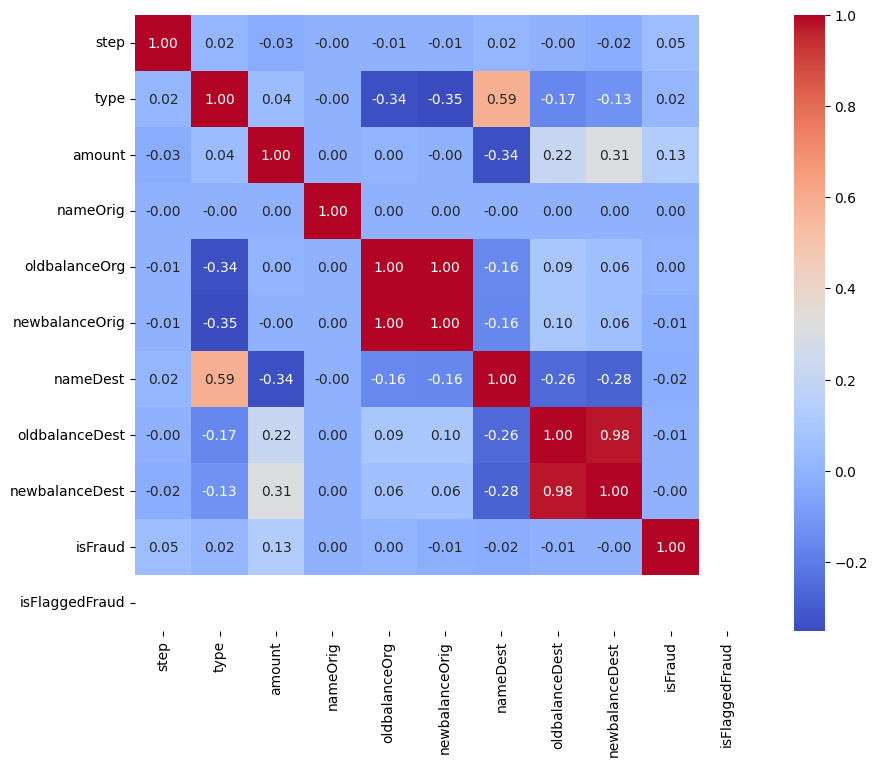

In [14]:
# visualize it with a heatmap
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.show()

In [15]:
# the above correlation shows the impact of each column on other columns,since we are having low correlation for every column.
# we are not excluding any columns

In [16]:
# Define your features and targets
X = Data.drop(['isFraud', 'isFlaggedFraud'], axis=1)
y = Data[['isFraud', 'isFlaggedFraud']]
# we are giving two features as target variable

In [17]:
# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [18]:
# we are applying smoting in the training set , due to the imbalance in the dataset of values of target variables.
# the count of 0 in iSFraud column is in lakshs but the count of value 1 is in thousands.
# to balance this we are applying smoting ,it will increase the values of the minority label in the training set so the training happens well.

In [19]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(sampling_strategy=0.5, random_state=42)

# Apply SMOTE only to the 'isFraud' column
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train['isFraud'])

# Check the number of samples after resampling
print("Original number of samples:", len(y_train['isFraud']))
print("Number of samples after resampling:", len(y_train_resampled))


Original number of samples: 838860
Number of samples after resampling: 1256913


In [20]:
# Initialize and train Extra Trees Regressor model
model = ExtraTreesClassifier(n_estimators=75, random_state=42)
model.fit(X_train_resampled, y_train_resampled)

ExtraTreesClassifier(n_estimators=75, random_state=42)

In [21]:
# Make predictions
y_pred = model.predict(X_test)

In [22]:
import pandas as pd
from sklearn.metrics import classification_report, accuracy_score

print(classification_report(y_test['isFraud'], y_pred))


              precision    recall  f1-score   support

           0       1.00      1.00      1.00    209491
           1       0.81      0.83      0.82       224

    accuracy                           1.00    209715
   macro avg       0.91      0.92      0.91    209715
weighted avg       1.00      1.00      1.00    209715



In [23]:
print("Accuracy for isFraud:", accuracy_score(y_test['isFraud'], y_pred))

Accuracy for isFraud: 0.9996185299096393


In [24]:
# The accuracy of the model tells the model is performing very well.

In [25]:
import pandas as pd
from sklearn.metrics import classification_report, accuracy_score

print("Accuracy for isFraud:", accuracy_score(y_test['isFraud'], y_pred))
print(classification_report(y_test['isFlaggedFraud'], y_pred))


Accuracy for isFraud: 0.9996185299096393


C:\Users\DELL\anaconda3\envs\tensorflow\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\DELL\anaconda3\envs\tensorflow\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

           0       1.00      1.00      1.00    209715
           1       0.00      0.00      0.00         0

    accuracy                           1.00    209715
   macro avg       0.50      0.50      0.50    209715
weighted avg       1.00      1.00      1.00    209715



C:\Users\DELL\anaconda3\envs\tensorflow\lib\site-packages\sklearn\metrics\_classification.py:1469: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
